In [182]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/Users/ryomisawa/Downloads/GoogleNews-vectors-negative300.bin', binary=True)

In [10]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [12]:
model.similarity('United_States', 'U.S.')

0.73107743

In [13]:
model.most_similar('United_States')

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [14]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

In [100]:
import pandas as pd
!git clone https://github.com/nicholas-leonard/word2vec
list = []

with open('word2vec/questions-words.txt') as f:
    lines = f.readlines()
    for line in lines:
        list.append(line.split())

for i in range(1, len(list)):
    if list[i][0] not in model:
        continue
    else: 
        most_similar = model.most_similar(positive=[model[list[i][1]], model[list[i][2]]],negative=[model[list[i][0]]])[0] 
        list[i].append(most_similar)

In [201]:
import numpy as np
combined = pd.read_csv('/Users/ryomisawa/Downloads/wordsim353 2/combined.csv')
vec_sim = []
for i in range(len(combined)):
    vec_sim.append(model.similarity(combined['Word 1'][i], combined['Word 2'][i]))
vec_sim = np.array(vec_sim)
hum_sim = np.array(combined['Human (mean)'].values.tolist())

N = len(vec_sim)
print('スピアマン相関係数:{}'.format(1 - (6 * sum((vec_sim - hum_sim) ** 2)) /float(N**3 - N)))

スピアマン相関係数:0.9982972326270205


In [184]:
countries = []
with open('/Users/ryomisawa/Downloads/countries') as f:
    lines = f.readlines()
    
    for line in lines:
        line = line.strip()
        countries.append(line)
countries_in_model = []
for s in countries:
    if s in model:
        countries_in_model.append(s)

from sklearn.cluster import KMeans

pred = KMeans(n_clusters=5).fit_predict(model[countries_in_model])

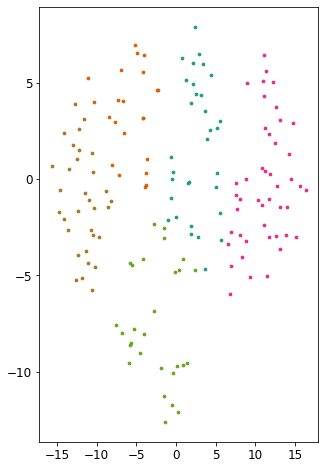

In [236]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy.random as rd
import scipy.stats as st
t_sne = TSNE().fit_transform(model[countries_in_model])

clustered = KMeans(n_clusters=5).fit_predict(t_sne)

fig, ax = plt.subplots(figsize=(5, 8))

# Set Color map
cmap = plt.get_cmap('Dark2')
for i in range(t_sne.shape[0]):
    cval = cmap(clustered[i] / 5)
    ax.scatter(t_sne[i][0], t_sne[i][1], marker='.', color=cval, s=30)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

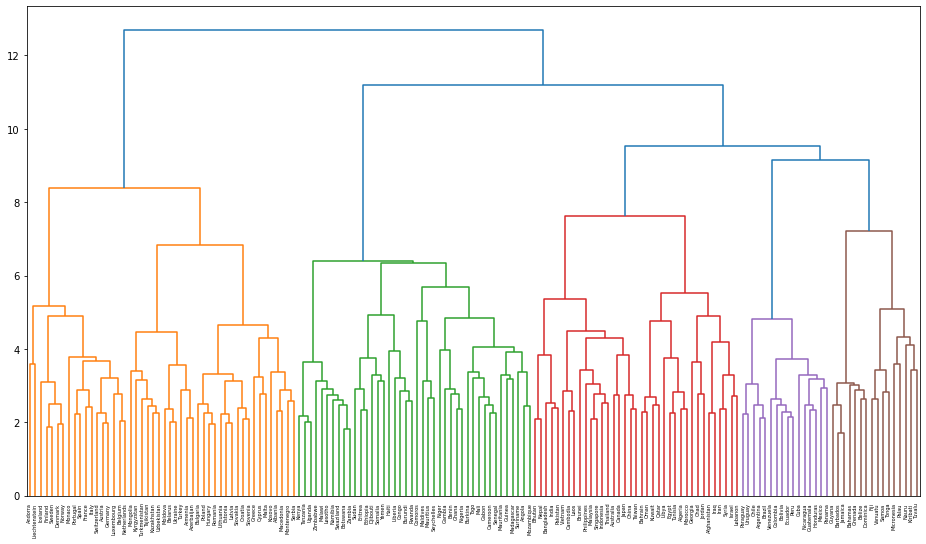

In [241]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
ward = linkage(model[countries_in_model], method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), facecolor='w', edgecolor='k')
dendrogram(ward, labels=countries_in_model)
plt.show()

'Andorra'